# Final Assignment

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

### Part 1

The `food_consumption.csv` dataset from the `data` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [5]:
food = pd.read_csv("data/food_consumption.csv")
print(food.head())

     country food_category  consumption  co2_emission
0  Argentina          pork        10.51         37.20
1  Argentina       poultry        38.66         41.53
2  Argentina          beef        55.48       1712.00
3  Argentina     lamb_goat         1.56         54.63
4  Argentina          fish         4.36          6.96


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [6]:
highestmedian = { "food category": "", "value": 0 }

for foodcat in food["food_category"].unique():
	print(foodcat)
	filtered = food[food["food_category"] == foodcat]["consumption"]
	median = np.median(filtered)
	if median > highestmedian["value"]:
		highestmedian["food category"] = foodcat
		highestmedian["value"] = median
	print("median", median)
	print(filtered.describe())

print("highest median in consumption:", highestmedian)

pork
median 10.355
count    130.000000
mean      16.123692
std       15.717646
min        0.000000
25%        2.090000
50%       10.355000
75%       28.227500
max       67.110000
Name: consumption, dtype: float64
poultry
median 19.855
count    130.000000
mean      21.219231
std       14.571980
min        0.470000
25%       10.910000
50%       19.855000
75%       29.747500
max       62.500000
Name: consumption, dtype: float64
beef
median 8.285
count    130.000000
mean      12.123385
std        9.654140
min        0.780000
25%        4.997500
50%        8.285000
75%       17.940000
max       55.480000
Name: consumption, dtype: float64
lamb_goat
median 1.3250000000000002
count    130.000000
mean       2.600154
std        3.665252
min        0.000000
25%        0.560000
50%        1.325000
75%        3.102500
max       21.120000
Name: consumption, dtype: float64
fish
median 13.95
count    130.000000
mean      17.287077
std       19.013508
min        0.240000
25%        6.025000
50%       1

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<Axes: xlabel='food_category', ylabel='co2_emission'>

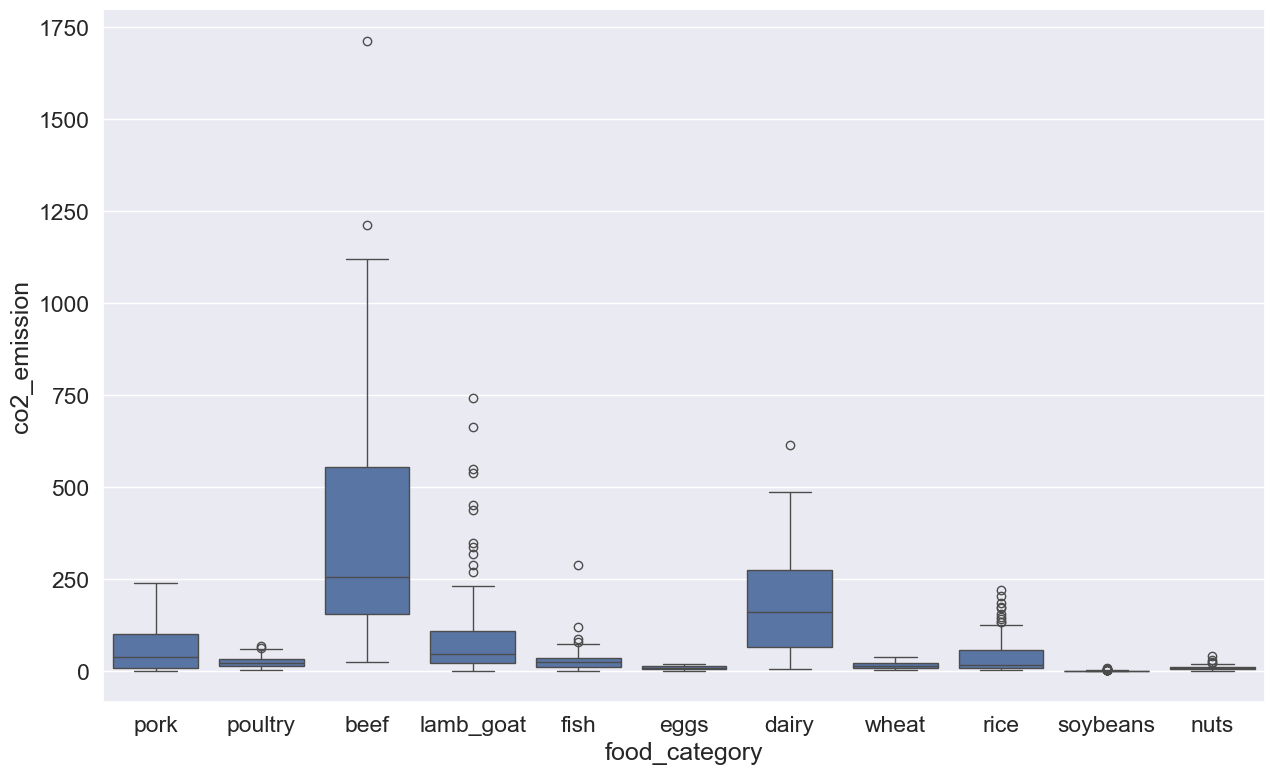

In [7]:
sns.boxplot(data=food, x="food_category", y="co2_emission")
# it's beef. IQR is basically the "height" of the boxes.

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [8]:
# it's still beef, the median is indicated by the middle line within the boxes.

4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

Excuse me while I start by just visualizing the data; I'll get to the actual task in a minute

In [9]:
# [returned_expression for iterator_var in iterable]
onlyPoultryAndFishFilter = [element in ["poultry", "fish"] for element in food["food_category"]]
onlyPoultryAndFish = food[onlyPoultryAndFishFilter]
onlyPoultryAndFish.describe()

,consumption,co2_emission
count,260.000000,260.000000
mean,19.253154,25.197615
std,17.020594,24.225642
min,0.240000,0.380000
25%,7.155000,9.667500
50%,16.565000,21.430000
75%,26.230000,33.670000
max,179.710000,286.940000


Text(53.92333333333332, 0.5, 'consumption in kg / (a*Person)')

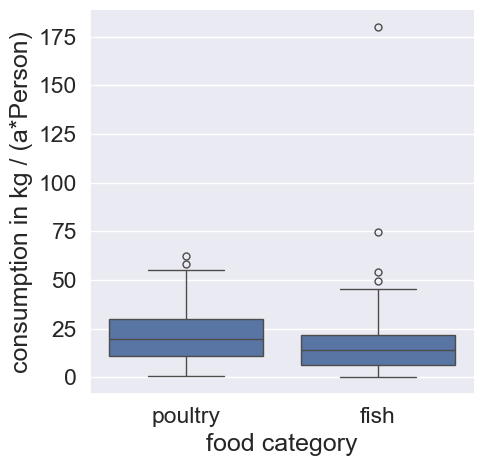

In [10]:
sns.catplot(onlyPoultryAndFish, x="food_category", y="consumption", kind="box")
plt.xlabel("food category")
plt.ylabel("consumption in kg / (a*Person)")

ok now to the permutation test;
Create a permutation test in order to assess the null hypothesis that there is no difference between the two means.

In [11]:
from scipy import stats
# test = stats.permutation_test(onlyPoultryAndFish)

### Part 2

The `distributions.csv` dataset from the `data` folder contains data drawn from 6 probability distributions – one per column. Load it to a DataFrame named `distributions` and check its contents.

In [12]:
distributions = pd.read_csv("data/distributions.csv")
distributions.head()

,distribution_1,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
0,False,100.004134,3.608307,890,1,-34,0.563827
1,False,100.008868,5.785856,897,1,-35,1.441859
2,False,100.004402,4.785344,898,3,-37,0.347664
3,False,100.000589,5.712047,890,0,-34,3.039330
4,False,100.017889,4.240379,898,1,-35,0.089587


1. Use the `.describe()` and `info()` methods on the `distributions` DataFrame to produce some preliminary information about each column. **What is the data type of each column?**

In [13]:
distributions.info()
distributions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distribution_1  1000 non-null   bool   
 1   distribution_2  1000 non-null   float64
 2   distribution_3  1000 non-null   float64
 3   distribution_4  1000 non-null   int64  
 4   distribution_5  1000 non-null   int64  
 5   distribution_6  1000 non-null   int64  
 6   distribution_7  1000 non-null   float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 48.0 KB


,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,100.000263,3.462706,899.630000,1.192000,-34.539000,0.513223
std,0.010155,1.466874,9.729531,1.091938,2.889087,0.497540
min,99.961668,1.002417,865.000000,0.000000,-39.000000,0.000033
25%,99.993916,2.223423,893.000000,0.000000,-37.000000,0.141789
50%,100.000598,3.426250,900.000000,1.000000,-34.000000,0.362279
75%,100.007031,4.679788,906.000000,2.000000,-32.000000,0.735851
max,100.034052,5.997595,929.000000,6.000000,-30.000000,3.039330


2. Loop through each column of `distributions` and for each column produce a plot to show the distribution.

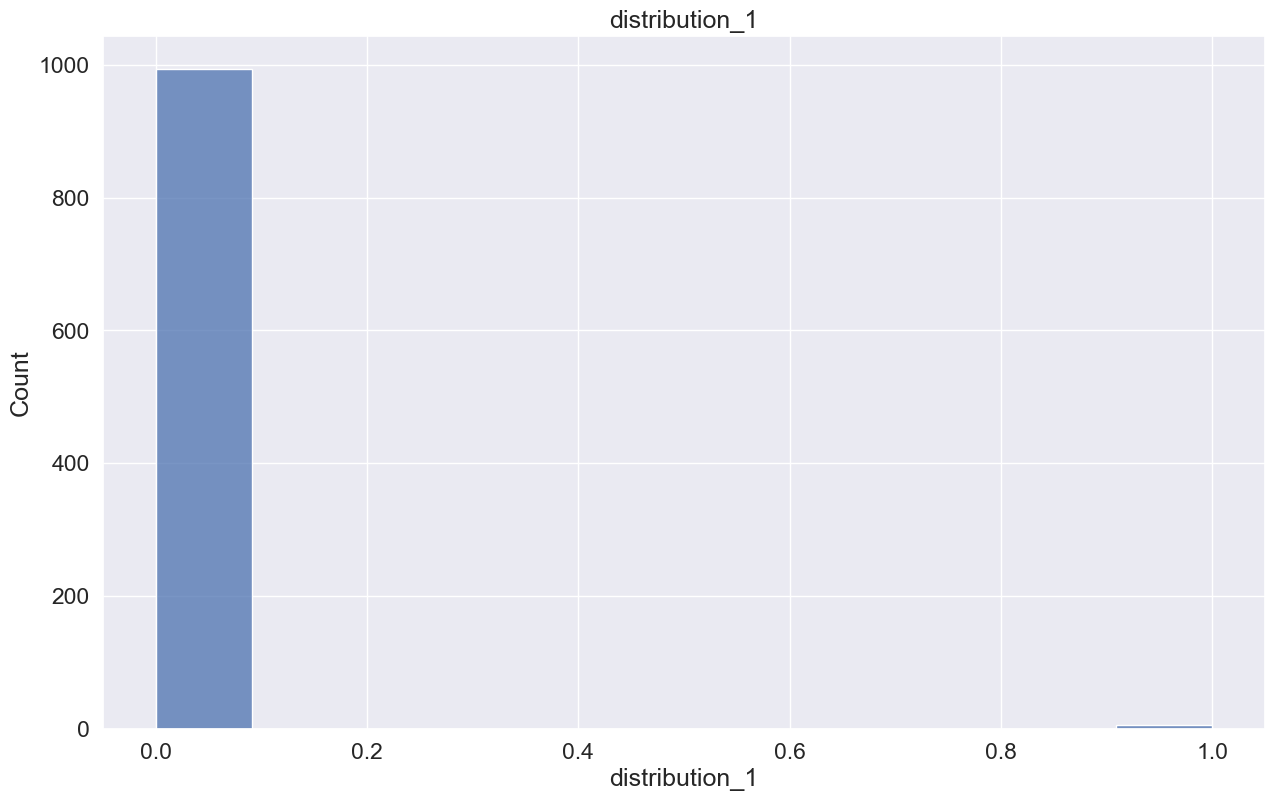

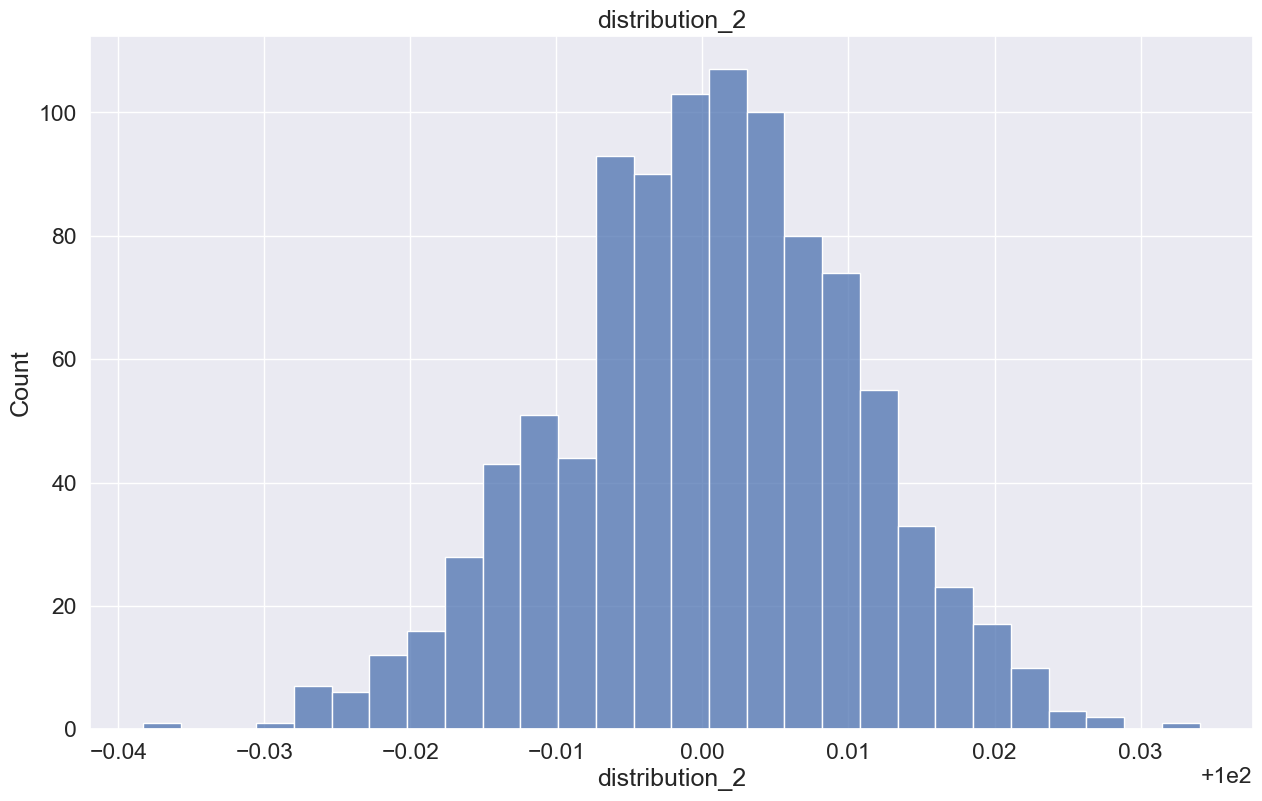

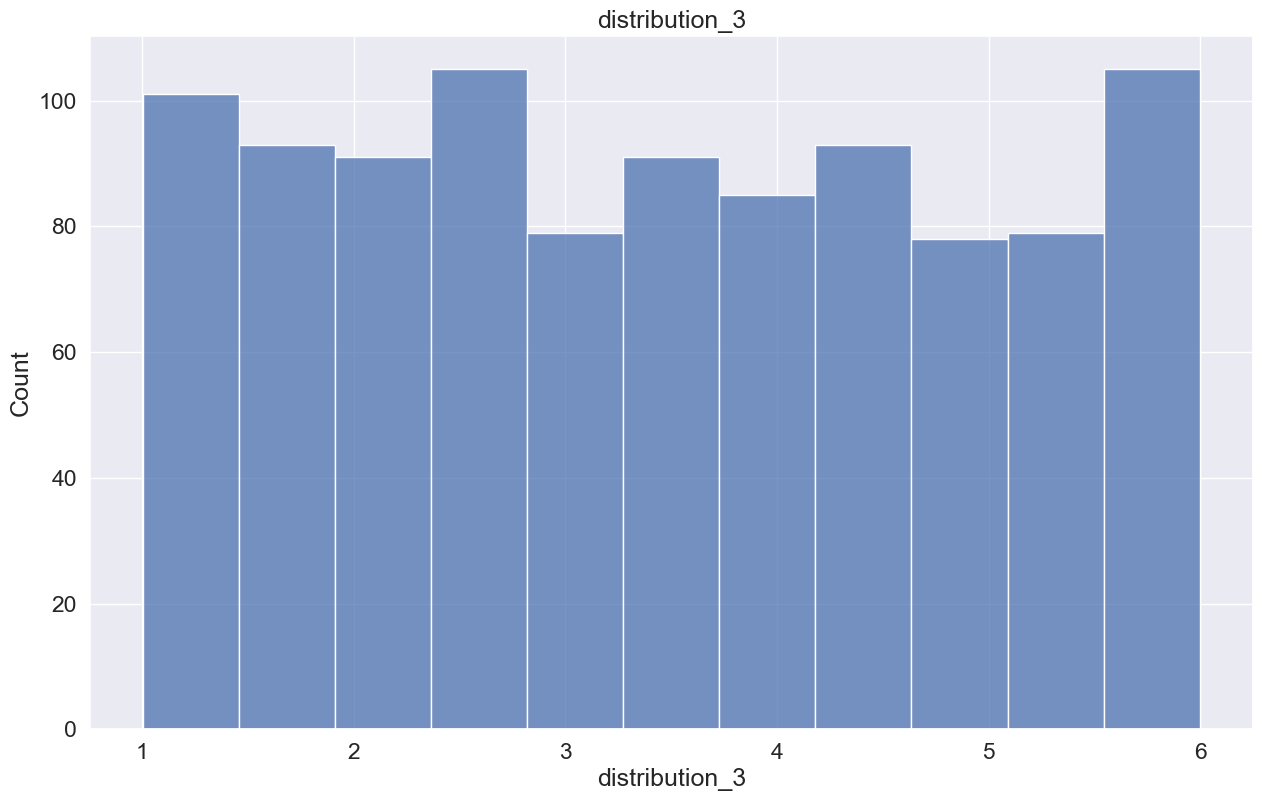

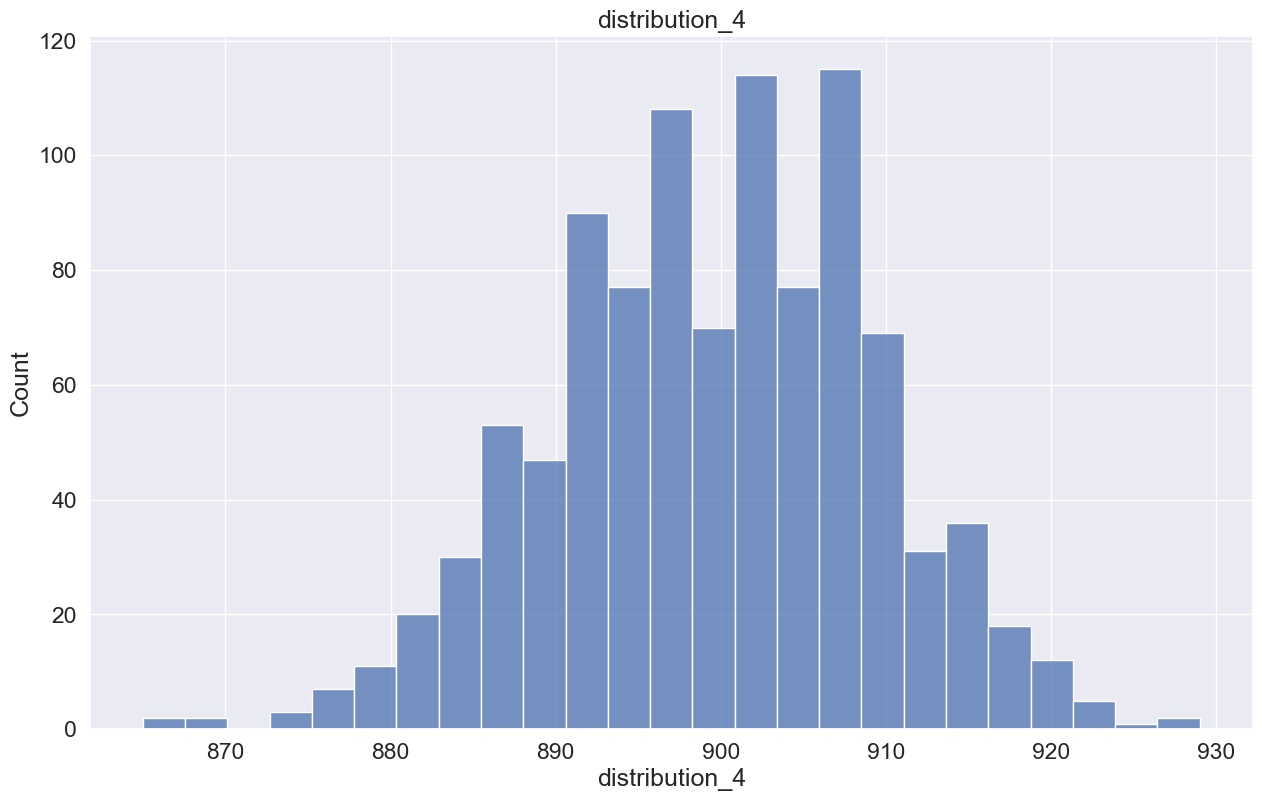

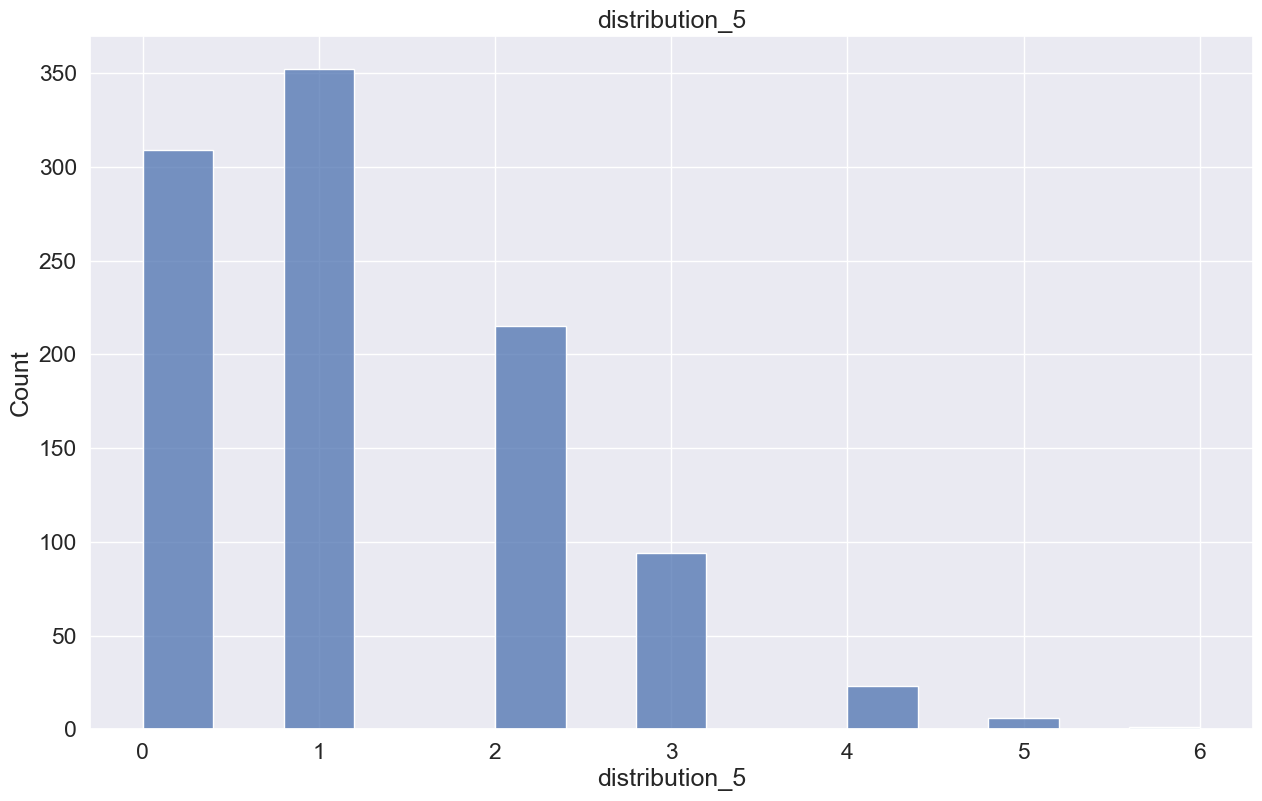

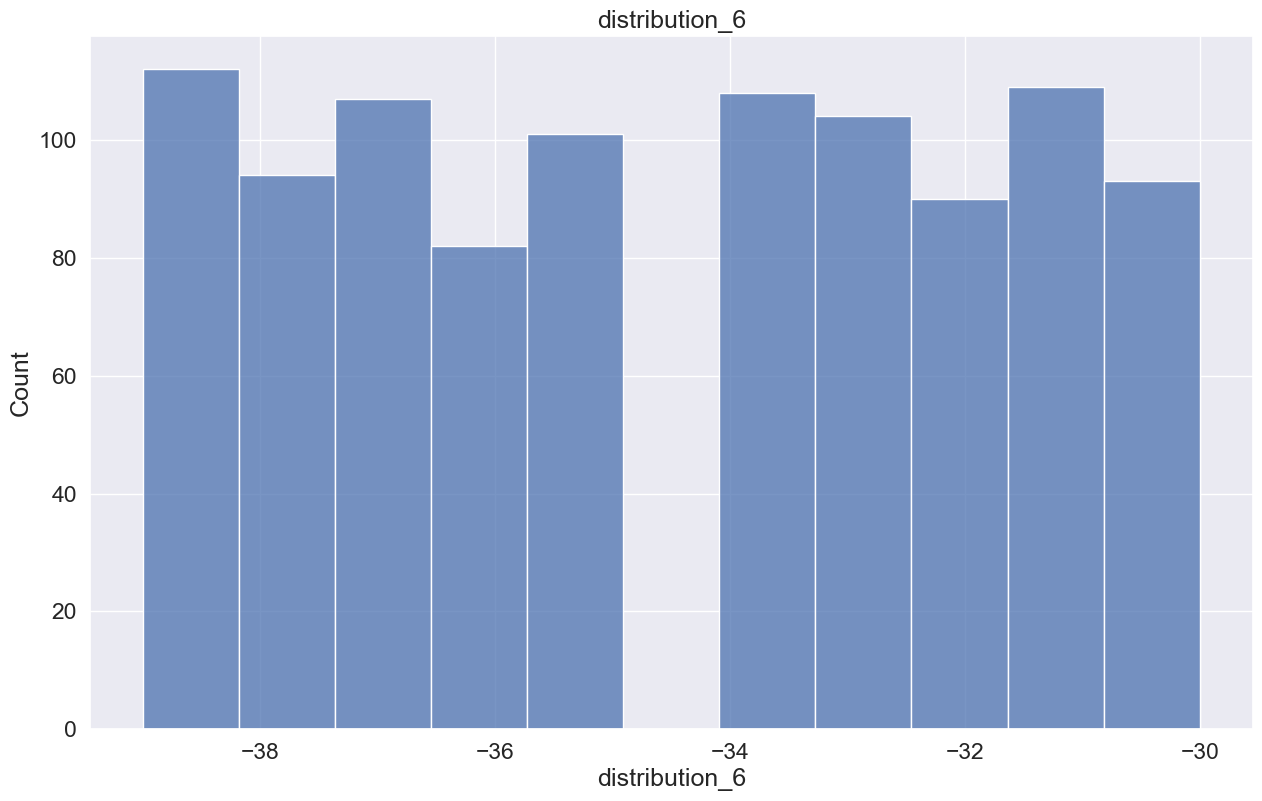

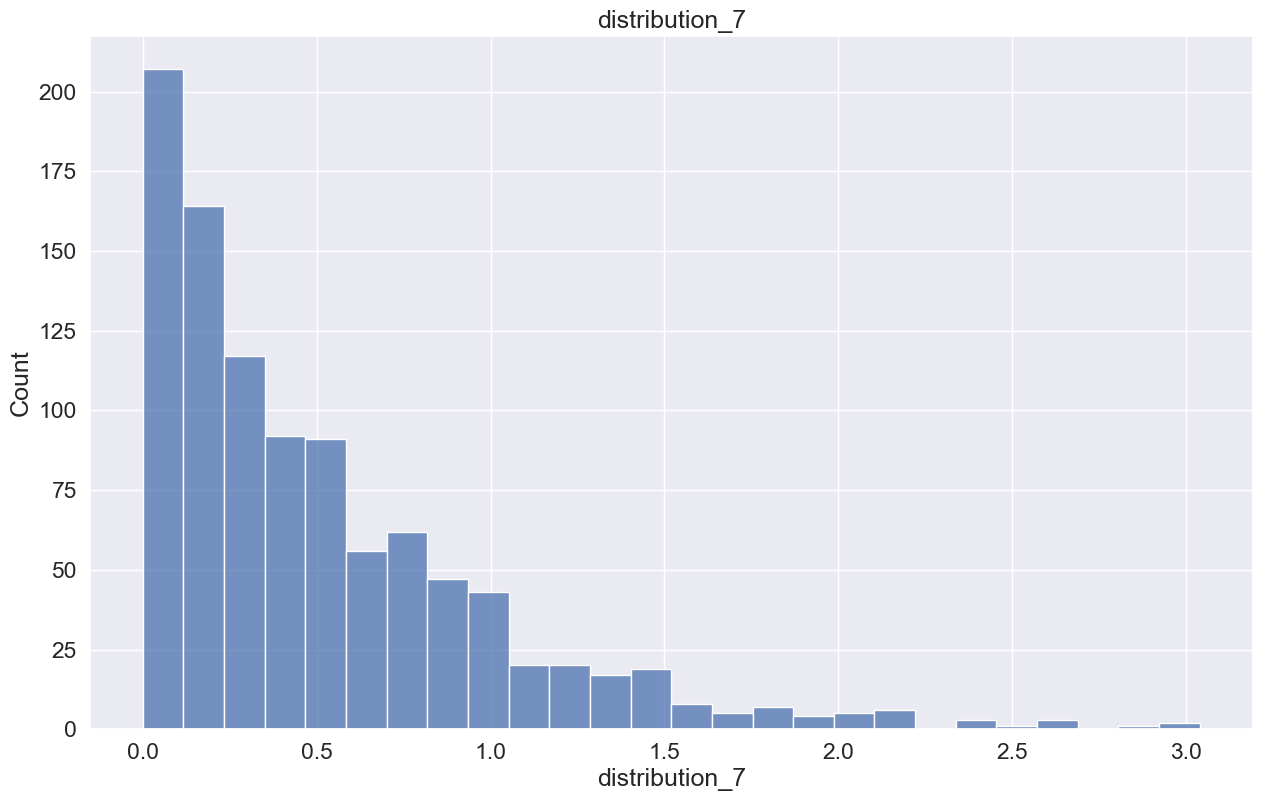

In [14]:
for column in distributions.columns:
	sns.histplot(distributions[column])
	plt.title(column)
	plt.show()

3. Each column of the `distributions` dataframe contains data drawn from a different distribution. **Associate each column to its probability distribution.** This is the list of the probability distributions used (one for each column):
    - Bernoulli
    - Binomial
    - Continuous Uniform
    - Gaussian
    - Discrete Uniform
    - Poisson
    - Exponential (this was not explain in classroom, go by exclusion)

In [25]:
# let's look at unique values first
for column in distributions.columns:
	print(f"Statistics {column}")
	print(f"Unique values: {len(distributions[column].unique())}")
	print(distributions[column].sample(3))

Statistics distribution_1
Unique values: 2
730    False
998    False
928    False
Name: distribution_1, dtype: bool
Statistics distribution_2
Unique values: 1000
936    100.011475
908     99.998130
281     99.987677
Name: distribution_2, dtype: float64
Statistics distribution_3
Unique values: 1000
969    1.887770
295    5.702179
582    4.390135
Name: distribution_3, dtype: float64
Statistics distribution_4
Unique values: 57
741    909
859    904
45     888
Name: distribution_4, dtype: int64
Statistics distribution_5
Unique values: 7
247    2
886    0
588    2
Name: distribution_5, dtype: int64
Statistics distribution_6
Unique values: 10
884   -33
758   -39
264   -33
Name: distribution_6, dtype: int64
Statistics distribution_7
Unique values: 1000
20     0.549899
50     0.068040
311    0.042317
Name: distribution_7, dtype: float64


- Bernoulli – 1
- Binomial
- Continuous Uniform – 3
- Gaussian
- Discrete Uniform – 6
- Poisson
- Exponential – 7

1. Distribution 7 is exponential distribution because it looks the part.
2. Bernoulli asks yes / no questions, so that one's 1
3. Both poisson and discrete uniform have to be integers – so that's Distributions 4, 5, and 6
4. Gaussian and Continuous Uniform are continuous, so they have to be 2, 3, or 4
5. the uniforms have to have all values within the same range, with very little variation; so for the discrete uniform that's 6
6. So, poisson is either 4 or 5; poisson measures events, so the values have to be > 0, buuuut unfortunately that's both of these; let's get back to this later
7. the continuous uniform is 3 that's most uniform out of the continuous ones
8. We still have to find: poisson, gaussian, binomial – out of 4, 5, or 2; Poisson is discrete, binomial and gaussian are not, but there is only one integer left????